             track_id             name           artist  \
0  TRIOREW128F424EAF0   Mr. Brightside      The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall            Oasis   
2  TROUVHL128F426C441  Come as You Are          Nirvana   
3  TRUEIND128F93038C4      Take Me Out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            Creep        Radiohead   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   
3  https://p.scdn.co/mp3-preview/399c401370438be4...  0ancVQ9wEcHVd0RrGICTE4   
4  https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...  01QoK9DA7VTeTSE3MNzp4I   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1 

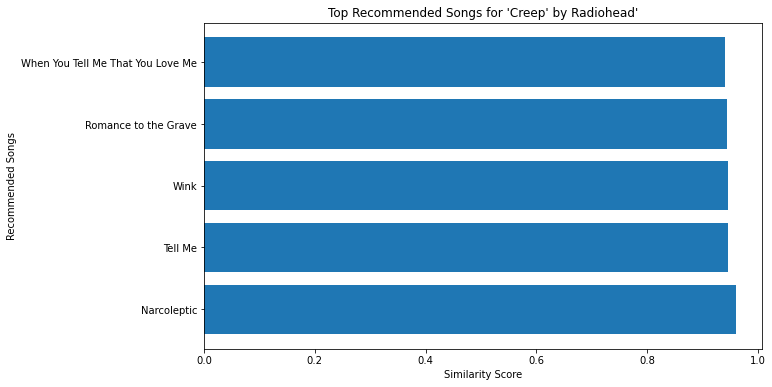

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Ensure the plot shows inline in Jupyter
%matplotlib inline

# Load the dataset
df = pd.read_csv('Music_Info.csv')  # Replace with your actual dataset file path

# Inspect the data
print(df.head())

# Specify the features to use for recommendations
features = ['danceability', 'duration_ms', 'energy', 'key', 'loudness', 
            'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'time_signature']

# Normalize the feature data
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features].astype(float))

# Function to search for a song by name and artist
def search_song(df, song_name=None, artist_name=None):
    if song_name and artist_name:
        results = df[(df['name'].str.contains(song_name, case=False, na=False)) & 
                      (df['artist'].str.contains(artist_name, case=False, na=False))]
    elif song_name:
        results = df[df['name'].str.contains(song_name, case=False, na=False)]
    elif artist_name:
        results = df[df['artist'].str.contains(artist_name, case=False, na=False)]
    else:
        print("Please provide either a song name or an artist name to search.")
        return None
    
    if results.empty:
        print("No songs found for your search.")
    else:
        print(f"Found {len(results)} songs. Showing top 5 results:")
        print(results[['track_id', 'name', 'artist']].head())
        
    return results

# Function to recommend similar songs based on a song's track_id
def recommend_songs_by_id(df, track_id, n_recommendations=5):
    # Get the index of the song by track_id
    track_index = df.index[df['track_id'] == track_id][0]
    
    # Get the feature vector for the selected song
    track_features = df.iloc[track_index][features].values.reshape(1, -1)
    
    # Calculate cosine similarity between the selected song and all other songs
    similarity_scores = cosine_similarity(track_features, df[features])[0]
    
    # Sort the songs based on similarity scores
    similar_songs_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]
    
    # Get the most similar songs
    recommendations = df.iloc[similar_songs_indices]
    return recommendations, similarity_scores[similar_songs_indices]

# Function to visualize recommendations
def visualize_recommendations(recommendations, similarity_scores, selected_song):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['name'], similarity_scores)  # Similarity scores directly
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Songs')
    plt.title(f"Top Recommended Songs for '{selected_song['name']}' by {selected_song['artist']}'")
    plt.show()

# Example usage
if __name__ == "__main__":
    # Take user input for the song name and artist name
    song_name = input("Enter the song name you want recommendations for: ")
    artist_name = input("Enter the artist name: ")
    
    # Search for the specified song
    search_results = search_song(df, song_name=song_name, artist_name=artist_name)
    
    # Get recommendations for the selected song
    if not search_results.empty:
        track_id = search_results.iloc[0]['track_id']  # Get the first search result's track_id
        selected_song = search_results.iloc[0]  # Store the selected song's details
        recommendations, similarity_scores = recommend_songs_by_id(df, track_id)
        
        # Display the recommendations
        print("\nRecommended Songs:")
        print(recommendations[['track_id', 'name', 'artist']])
        
        # Visualize recommendations
        visualize_recommendations(recommendations, similarity_scores, selected_song)
